<a name="top" id="top"></a>

<div align="center">

<h1>PSO1: Control Systems in Python using the `control` Package</h1>

<p>
  <a href="https://github.com/bernalde"><strong>David E. Bernal Neira</strong></a><br>
  <em>Davidson School of Chemical Engineering, Purdue University</em><br>
  <em>Universities Space Research Association</em><br>
  <em>NASA QuAIL</em>
</p>

<br>

<p>
  <a href="https://github.com/mhuertasm"><strong>Mateo Huertas Marulanda</strong></a><br>
  <em>Chemical Engineering, National University of Colombia</em><br>
  <em>Undergraduate Visiting Scholar</em>
</p>

<br>

<p>
  <a href="https://colab.research.google.com" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
  <a href="https://secquoia.github.io/">
    <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA">
  </a>
</p>

</div>

This notebook introduces the use of the [`control`](https://github.com/python-control/python-control) package for modeling and analyzing control systems in Python. It provides a practical demonstration of creating transfer functions, analyzing system responses, and plotting results.

This package will be used in the course to solve the exercises. The documentation for the package can be found at:
[https://python-control.readthedocs.io](https://python-control.readthedocs.io)

Following is a little explanation of how to use the most commmon functions used across all the excersices

## Transfer Function
A **transfer function** represents the relationship between the input and output of a linear time-invariant system in the Laplace domain.

A general transfer function has the form:
$$
H(s) = \frac{Y(s)}{U(s)} = \frac{b_ms^m + ... + b_1s + b_0}{a_ns^n + ... + a_1s + a_0}
$$

Example: $H(s) = \frac{1}{s^2 + 2s + 1}$

In [14]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

num = [1]
den = [1, 2, 1]
system = ctrl.TransferFunction(num, den)
print(system)

<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      1
-------------
s^2 + 2 s + 1



## 📈 Step Response
The **step response** is the output of a system when the input is a unit step function (i.e., input suddenly changes from 0 to 1 at t=0).

It helps evaluate how the system responds to a sudden change in input.

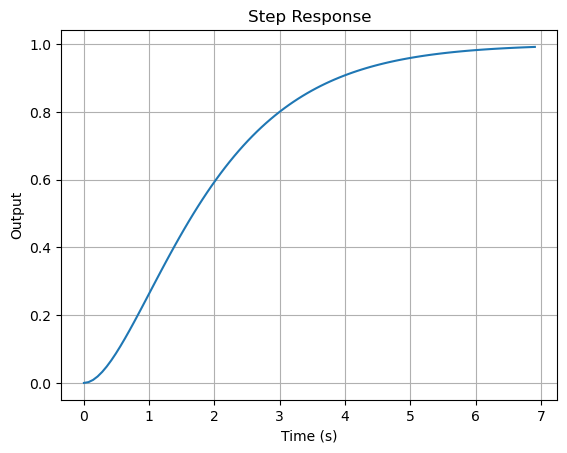

In [15]:
t, y = ctrl.step_response(system)
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

## 📊 Forced Response
The **forced response** of a system shows how the system behaves when subject to an arbitrary (non-zero) input.

It solves the differential equation:
$$
\dot{x} = Ax + Bu, \quad y = Cx + Du
$$
for a given input function \( u(t) \).

You can use the `control.forced_response()` function to simulate the response of a system to **any custom input**, such as:
- Ramp input
- Sinusoidal input
- Rectangular pulse (via Heaviside functions)
- Exponential decay/growth
- Arbitrary signals loaded from data

This is useful when step or impulse responses are insufficient to describe how your system behaves in real scenarios.

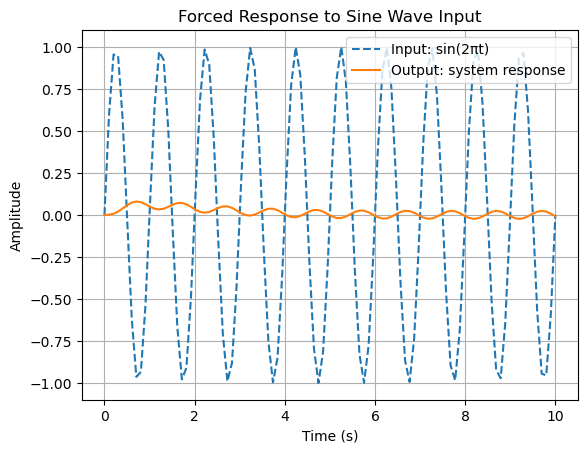

In [16]:
# Example: input is a sine wave
T = np.linspace(0, 10, 100)
U = np.sin(2 * np.pi * T)                 # Sine wave input

# Compute the forced response
T, y= ctrl.forced_response(system, T, U)

# Plot input and output
plt.plot(T, U, '--', label='Input: sin(2πt)')
plt.plot(T, y, label='Output: system response')
plt.title('Forced Response to Sine Wave Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## 🧮 Heaviside Function
The **Heaviside step function** is a mathematical function defined as:
$$
H(t) = \begin{cases} 0, & t < 0 \\ 1, & t \geq 0 \end{cases}
$$

It is commonly used to model step inputs or sudden changes in a signal.

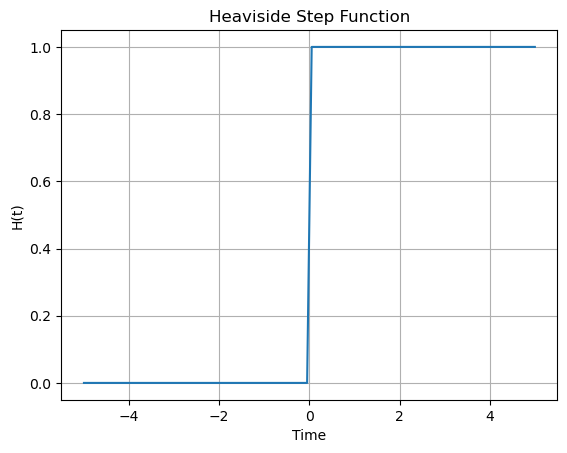

In [17]:
# Example: using numpy heaviside to simulate an input
T = np.linspace(-5, 5, 100)
U = np.heaviside(T, 1)
plt.plot(T, U)
plt.title('Heaviside Step Function')
plt.xlabel('Time')
plt.ylabel('H(t)')
plt.grid(True)
plt.show()

## ⬛ Rectangular Pulse using Heaviside Function
A **rectangular pulse** can be constructed by subtracting two Heaviside step functions:

$$
P(t) = H(t - t_0) - H(t - t_1)
$$
This creates a pulse of amplitude 1 between $t_0$ and $t_1$.
We can use this as an input to observe the **forced response** of the system.

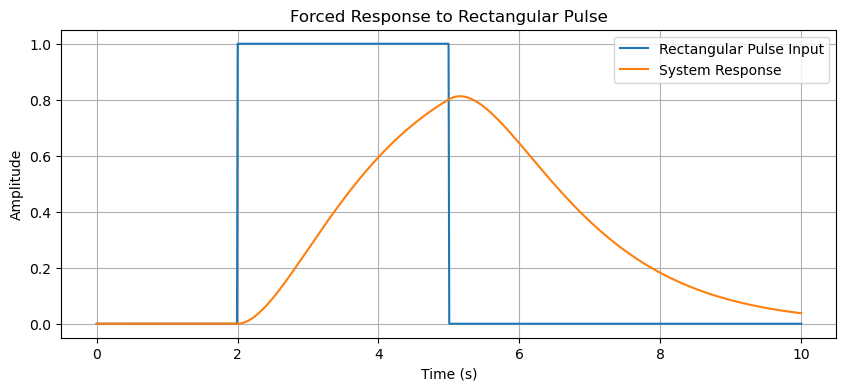

In [18]:
# Define time array
T = np.linspace(0, 10, 1000)
pulse = np.heaviside(T - 2, 1) - np.heaviside(T - 5, 1)  # Pulse from t=2 to t=5

# Compute forced response of the system to the rectangular pulse input
T, y= ctrl.forced_response(system, T, pulse)

# Plot input and output
plt.figure(figsize=(10, 4))
plt.plot(T, pulse, label='Rectangular Pulse Input')
plt.plot(T, y, label='System Response')
plt.title('Forced Response to Rectangular Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


##  Useful links and references

> **Fuller, S., Greiner, B., Moore, J., Murray, R., van Paassen, R., & Yorke, R.** (2021).  
> *The Python Control Systems Library (python-control).*  
> In *Proceedings of the 60th IEEE Conference on Decision and Control (CDC)* (pp. 4875–4881). IEEE.  
> [https://github.com/python-control/python-control](https://github.com/python-control/python-control)


